In [32]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import plotly.express as px

In [33]:
df = pd.read_csv('meteo.csv')


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    407 non-null    object 
 1   tavg    407 non-null    float64
 2   tmin    407 non-null    float64
 3   tmax    406 non-null    float64
 4   prcp    407 non-null    float64
 5   snow    1 non-null      float64
 6   wdir    406 non-null    float64
 7   wspd    406 non-null    float64
 8   wpgt    0 non-null      float64
 9   pres    406 non-null    float64
 10  tsun    0 non-null      float64
dtypes: float64(10), object(1)
memory usage: 35.1+ KB


In [35]:
df.head()

,time,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,2022-01-02 00:00:00,4.9,-0.1,12.0,0.0,NaN,313.0,2.4,NaN,1025.3,NaN
1,2022-01-03 00:00:00,3.7,1.3,5.0,0.0,NaN,8.0,1.8,NaN,1020.6,NaN
2,2022-01-04 00:00:00,5.6,4.0,8.4,0.0,NaN,129.0,2.7,NaN,1012.4,NaN
3,2022-01-05 00:00:00,9.9,6.8,16.0,0.5,NaN,153.0,7.6,NaN,1001.7,NaN
4,2022-01-06 00:00:00,5.9,4.0,9.2,38.1,NaN,291.0,13.9,NaN,1011.9,NaN


In [36]:
df_meteo = df.drop(columns =['tmin', 'tmax', 'snow','wspd', 'wpgt', 'tsun', 'pres', 'wdir', 'prcp'])

In [37]:
df_meteo.head()

,time,tavg
0,2022-01-02 00:00:00,4.9
1,2022-01-03 00:00:00,3.7
2,2022-01-04 00:00:00,5.6
3,2022-01-05 00:00:00,9.9
4,2022-01-06 00:00:00,5.9


In [38]:
df_meteo['time'] = pd.to_datetime(df_meteo['time'])

In [39]:
df_meteo =df_meteo.set_index('time')

In [40]:
df_meteo

,tavg
time,
2022-01-02,4.9
2022-01-03,3.7
2022-01-04,5.6
2022-01-05,9.9
2022-01-06,5.9
...,...
2023-02-08,0.7
2023-02-09,0.5
2023-02-10,0.9


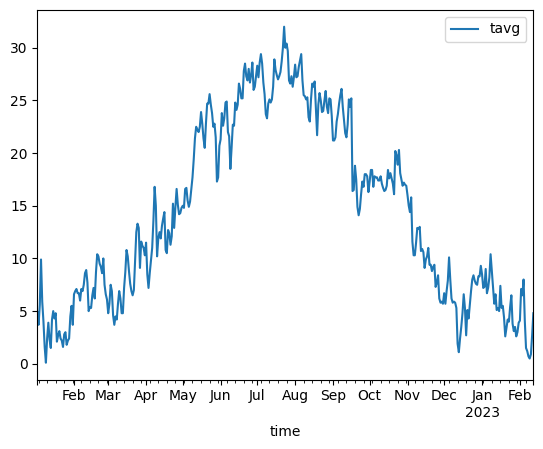

In [41]:
df_meteo.plot();

array([<Axes: xlabel='time'>], dtype=object)

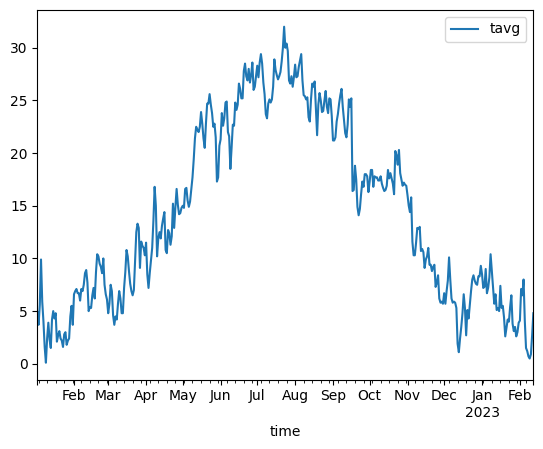

In [42]:
df_meteo.plot(subplots = True)

In [43]:
df_meteo['tavg']= df_meteo['tavg'].fillna(method = 'ffill')
#df_meteo['prcp']= df_meteo['prcp'].fillna(method = 'ffill')

C:\Users\giorg\AppData\Local\Temp\ipykernel_3100\2591390368.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_meteo['tavg']= df_meteo['tavg'].fillna(method = 'ffill')


In [44]:
data = pd.read_csv('dati.csv',
                    index_col='Calendario',
                    parse_dates=True
                    )
data

df_burger=data[data['Categoria']=='Burger']
df_burger

,Categoria,Quantita
Calendario,,
2022-01-02,Burger,50
2022-01-10,Burger,1
2022-01-11,Burger,27
2022-01-12,Burger,48
2022-01-13,Burger,26
...,...,...
2023-02-08,Burger,60
2023-02-09,Burger,75
2023-02-10,Burger,117


In [45]:
df_burger = df_burger.drop(columns =['Categoria'])

In [46]:
df_unione=pd.merge(df_burger,df_meteo, how='inner', left_index=True, right_index=True)
df_unione.index.name="time"
df_unione.head()

,Quantita,tavg
time,,
2022-01-02,50,4.9
2022-01-10,1,2.4
2022-01-11,27,3.9
2022-01-12,48,2.3
2022-01-13,26,1.5


In [47]:
df_unione = df_unione.reset_index()[['time','Quantita','tavg']].rename({'time':'ds','Quantita':'y','tavg':'tavg'}, axis='columns')
df_unione

,ds,y,tavg
0,2022-01-02,50,4.9
1,2022-01-10,1,2.4
2,2022-01-11,27,3.9
3,2022-01-12,48,2.3
4,2022-01-13,26,1.5
...,...,...,...
388,2023-02-08,60,0.7
389,2023-02-09,75,0.5
390,2023-02-10,117,0.9
391,2023-02-11,152,2.7


In [48]:
df_unione['month']= df_unione['ds'].dt.month

In [49]:
df_unione[['month','tavg']].groupby('month').agg({'tavg':{'max','min','mean'}})

tavg            
            mean   max   min
month                       
1       4.633333  10.4   1.5
2       6.280000  10.4   0.5
3       7.922581  13.3   3.7
4      12.586667  16.8   7.2
5      20.338710  25.6  14.8
6      24.866667  28.6  18.5
7      27.374194  32.0  23.3
8      25.655556  29.4  21.7
9      20.283333  26.1  14.1
10     17.677419  20.3  16.1
11     10.296429  16.0   5.7
12      6.016667  10.1   1.1

In [50]:
df_unione[['y','tavg']].corr()

,y,tavg
y,1.000000,0.140076
tavg,0.140076,1.000000


In [51]:
df_unione.query('tavg>15')[['y','tavg']].corr()

,y,tavg
y,1.000000,0.038035
tavg,0.038035,1.000000


In [52]:
df_unione['month']= df_unione['ds'].dt.month
df_unione[['month','tavg']].groupby('month').agg({'tavg':{'max','min','mean'}})

df_unione['month_bins'] = pd.cut(df_unione['month'],bins=3,labels=False)
df_unione

,ds,y,tavg,month,month_bins
0,2022-01-02,50,4.9,1,0
1,2022-01-10,1,2.4,1,0
2,2022-01-11,27,3.9,1,0
3,2022-01-12,48,2.3,1,0
4,2022-01-13,26,1.5,1,0
...,...,...,...,...,...
388,2023-02-08,60,0.7,2,0
389,2023-02-09,75,0.5,2,0
390,2023-02-10,117,0.9,2,0
391,2023-02-11,152,2.7,2,0


In [53]:
train = df_unione[(df_unione['ds']>='2022-01-01') & (df_unione['ds']<='2022-11-30')]
test = df_unione[(df_unione['ds']>'2022-11-30')]

In [54]:
train

,ds,y,tavg,month,month_bins
0,2022-01-02,50,4.9,1,0
1,2022-01-10,1,2.4,1,0
2,2022-01-11,27,3.9,1,0
3,2022-01-12,48,2.3,1,0
4,2022-01-13,26,1.5,1,0
...,...,...,...,...,...
315,2022-11-26,139,8.4,11,2
316,2022-11-27,88,6.2,11,2
317,2022-11-28,18,5.8,11,2
318,2022-11-29,66,5.9,11,2


In [55]:
test

,ds,y,tavg,month,month_bins
320,2022-12-01,53,6.7,12,2
321,2022-12-02,78,5.7,12,2
322,2022-12-03,124,6.9,12,2
323,2022-12-04,113,7.9,12,2
324,2022-12-05,21,10.1,12,2
...,...,...,...,...,...
388,2023-02-08,60,0.7,2,0
389,2023-02-09,75,0.5,2,0
390,2023-02-10,117,0.9,2,0
391,2023-02-11,152,2.7,2,0


In [56]:
from prophet import Prophet

model = Prophet(interval_width=0.95,
                yearly_seasonality=True
                )


#model.add_regressor('month_bins',standardize=False,mode='multiplicative')


model.fit(train)

17:16:52 - cmdstanpy - INFO - Chain [1] start processing
17:16:52 - cmdstanpy - INFO - Chain [1] done processing


In [57]:
future = model.make_future_dataframe(periods=73)
future.tail()

,ds
388,2023-02-07
389,2023-02-08
390,2023-02-09
391,2023-02-10
392,2023-02-11


In [58]:
model

In [59]:
forecast = model.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
388,2023-02-07,55.216463,15.080993,90.048581
389,2023-02-08,62.080301,27.428957,100.148446
390,2023-02-09,53.441073,19.103017,86.555605
391,2023-02-10,77.788418,38.108510,114.756551
392,2023-02-11,91.821864,55.408182,130.474127


In [60]:
from prophet.plot import plot_plotly
from datetime import datetime

fig = plot_plotly(model, forecast)
fig.update_layout(
                  yaxis_title="Quantità burger",
                  xaxis_title="Data",
                  title="Burger venduti",
                  )

fig

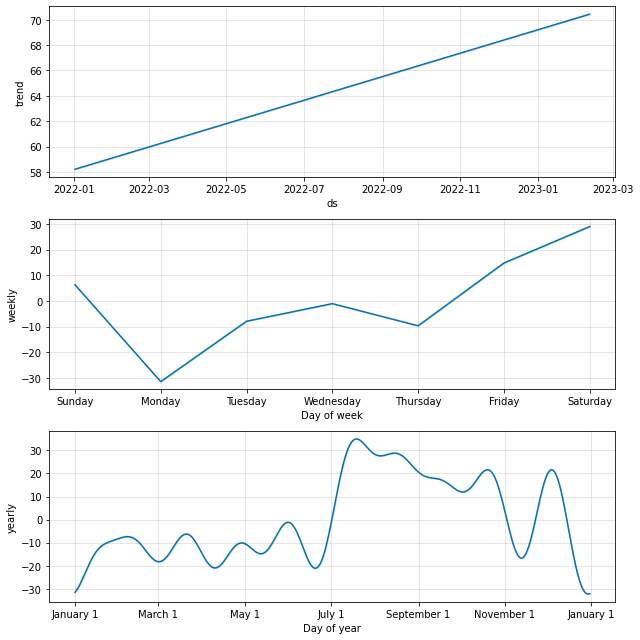

In [ ]:
fig2 = model.plot_components(forecast)